In [267]:
import pandas as pd 

In [268]:
import numpy as np 
import matplotlib.pyplot as plt

In [269]:
data=pd.read_csv('Spray_Angle_Class4.csv')

In [270]:
data.head()

,number,coating_material,wt_mat_1_per,therm_cond_mat_1,spec_heat_cap_mat_1,mod_elas_mat_1,poisson_ratio_mat_1,tensile_str_mat_1,yield_str_mat_1,melt_point_mat_1,...,substrate_material,substrate_hv,substrate_roughness_ra,substrate_roughness_rz,deposition_temperature_celcium,spray_angle_deg,stand_off_distance_mm,travel_speed_mm_sec,feedrate_g_min,DE
0,1,1,0.8,120,0.375,110000,0.375,300,95,915,...,st20,114.18,4.28,24.92,450,30,10,5,16,1.183844
1,2,1,0.8,120,0.375,110000,0.375,300,95,915,...,st20,114.18,4.28,24.92,450,30,10,5,16,0.731603
2,3,1,0.8,120,0.375,110000,0.375,300,95,915,...,st20,114.18,4.28,24.92,450,30,10,5,16,1.074029
3,4,1,0.8,120,0.375,110000,0.375,300,95,915,...,st20,114.18,4.28,24.92,450,30,10,5,16,1.029021
4,5,1,0.8,120,0.375,110000,0.375,300,95,915,...,st20,114.18,4.28,24.92,450,30,10,5,16,0.546042


In [271]:
data.dtypes



number                              int64
coating_material                    int64
wt_mat_1_per                      float64
therm_cond_mat_1                    int64
spec_heat_cap_mat_1               float64
mod_elas_mat_1                      int64
poisson_ratio_mat_1               float64
tensile_str_mat_1                   int64
yield_str_mat_1                     int64
melt_point_mat_1                    int64
wt_per_al2o3                      float64
substrate_material                 object
substrate_hv                      float64
substrate_roughness_ra            float64
substrate_roughness_rz            float64
deposition_temperature_celcium      int64
spray_angle_deg                     int64
stand_off_distance_mm               int64
travel_speed_mm_sec                 int64
feedrate_g_min                      int64
DE                                float64
dtype: object

In [272]:
import pandas as pd

descriptive_stats = data.describe()


print(descriptive_stats)


          number  coating_material  wt_mat_1_per  therm_cond_mat_1  \
count  84.000000         84.000000     84.000000         84.000000   
mean   42.500000          1.761905      0.666667        209.333333   
std    24.392622          0.754409      0.117538        140.411558   
min     1.000000          1.000000      0.550000         59.000000   
25%    21.750000          1.000000      0.550000        120.000000   
50%    42.500000          2.000000      0.600000        120.000000   
75%    63.250000          2.000000      0.800000        385.000000   
max    84.000000          3.000000      0.800000        385.000000   

       spec_heat_cap_mat_1  mod_elas_mat_1  poisson_ratio_mat_1  \
count            84.000000            84.0            84.000000   
mean              0.379000        110000.0             0.356143   
std               0.004749             0.0             0.016464   
min               0.375000        110000.0             0.340000   
25%               0.375000        

In [273]:

threshold = 0.3

cor_target = abs(corr_matrix['DE']) 

relevant_features = cor_target[cor_target > threshold]
print("Highly correlated features with 'target':\n", relevant_features)


Highly correlated features with 'target':
 number                 0.691212
coating_material       0.460460
wt_mat_1_per           0.359454
poisson_ratio_mat_1    0.413340
wt_per_al2o3           0.359454
spray_angle_deg        0.842553
feedrate_g_min         0.431459
DE                     1.000000
Name: DE, dtype: float64


C:\Users\shami\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


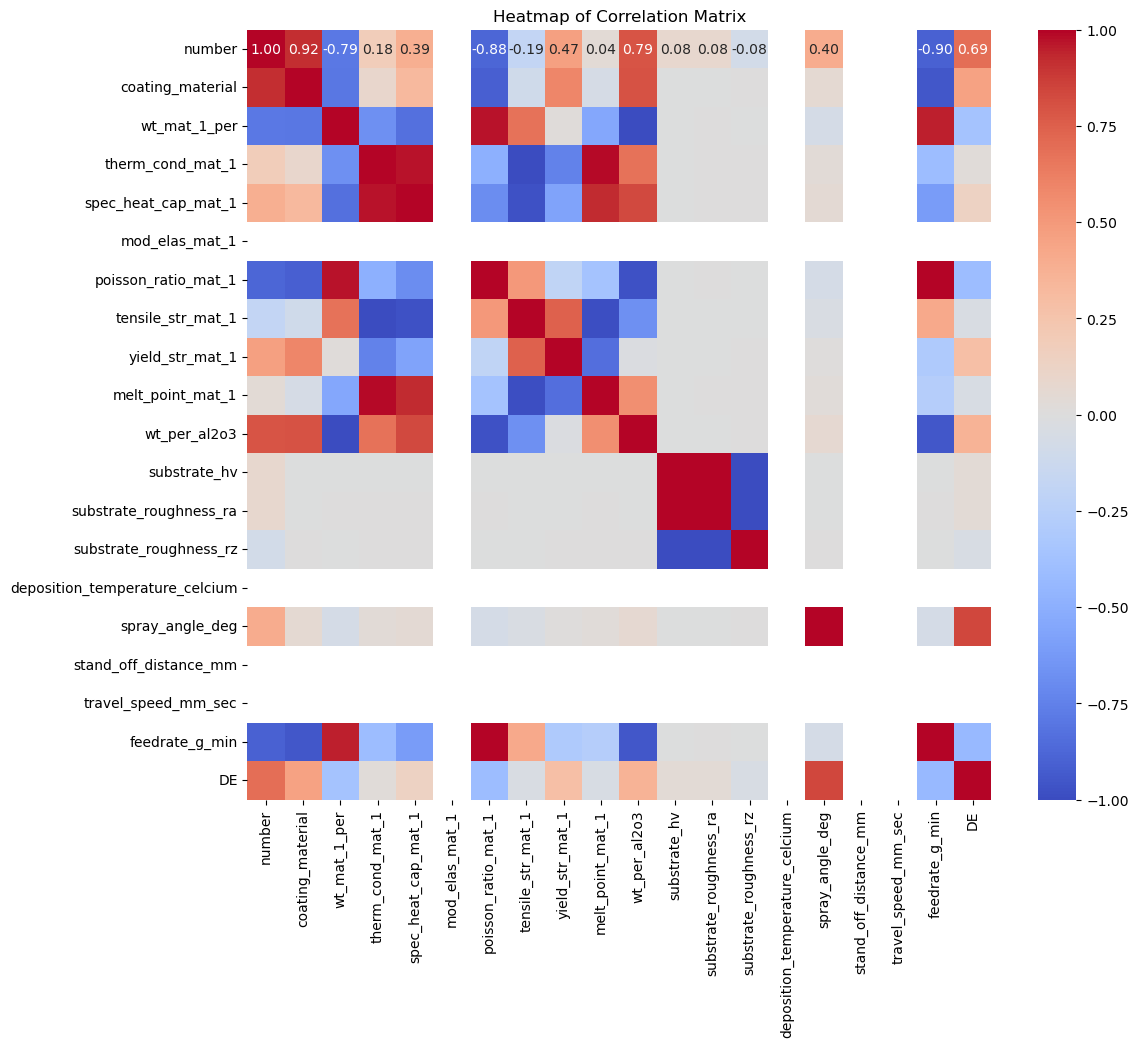

In [274]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.drop('substrate_material', inplace=False ,axis=1).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()


In [275]:

cor_target = abs(corr_matrix['DE'])  

threshold = 0.4
relevant_features = cor_target[cor_target > threshold]
print("Features highly correlated with DE (threshold > 0.3):\n", relevant_features)

high_cor_pairs = [(i, j) for i in relevant_features.index for j in relevant_features.index if i != j and abs(corr_matrix.loc[i, j]) > 0.8]
print("\nHighly correlated pairs to consider dropping one of each:\n", high_cor_pairs)


Features highly correlated with DE (threshold > 0.3):
 number                 0.691212
coating_material       0.460460
poisson_ratio_mat_1    0.413340
spray_angle_deg        0.842553
feedrate_g_min         0.431459
DE                     1.000000
Name: DE, dtype: float64

Highly correlated pairs to consider dropping one of each:
 [('number', 'coating_material'), ('number', 'poisson_ratio_mat_1'), ('number', 'feedrate_g_min'), ('coating_material', 'number'), ('coating_material', 'poisson_ratio_mat_1'), ('coating_material', 'feedrate_g_min'), ('poisson_ratio_mat_1', 'number'), ('poisson_ratio_mat_1', 'coating_material'), ('poisson_ratio_mat_1', 'feedrate_g_min'), ('spray_angle_deg', 'DE'), ('feedrate_g_min', 'number'), ('feedrate_g_min', 'coating_material'), ('feedrate_g_min', 'poisson_ratio_mat_1'), ('DE', 'spray_angle_deg')]


In [276]:

features_to_drop = ['number', 'coating_material', 'poisson_ratio_mat_1']
data_reduced = data.drop(features_to_drop, axis=1)
print("Reduced feature set:")
print(len(data_reduced.columns))


Reduced feature set:
18


In [277]:
data_reduced.columns

Index(['wt_mat_1_per', 'therm_cond_mat_1', 'spec_heat_cap_mat_1',
       'mod_elas_mat_1', 'tensile_str_mat_1', 'yield_str_mat_1',
       'melt_point_mat_1', 'wt_per_al2o3', 'substrate_material',
       'substrate_hv', 'substrate_roughness_ra', 'substrate_roughness_rz',
       'deposition_temperature_celcium', 'spray_angle_deg',
       'stand_off_distance_mm', 'travel_speed_mm_sec', 'feedrate_g_min', 'DE'],
      dtype='object')

In [278]:
print(data_reduced)


    wt_mat_1_per  therm_cond_mat_1  spec_heat_cap_mat_1  mod_elas_mat_1  \
0            0.8               120                0.375          110000   
1            0.8               120                0.375          110000   
2            0.8               120                0.375          110000   
3            0.8               120                0.375          110000   
4            0.8               120                0.375          110000   
..           ...               ...                  ...             ...   
79           0.6                59                0.376          110000   
80           0.6                59                0.376          110000   
81           0.6                59                0.376          110000   
82           0.6                59                0.376          110000   
83           0.6                59                0.376          110000   

    tensile_str_mat_1  yield_str_mat_1  melt_point_mat_1  wt_per_al2o3  \
0                 300    

In [279]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error  


In [280]:

data_reduced['substrate_material'] = data_reduced['substrate_material'].astype('category')
X = data_reduced.drop('DE', axis=1)
y = data_reduced['DE']


In [281]:

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [282]:

categorical_features = ['substrate_material']
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [283]:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
])

In [284]:

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=400, random_state=42))
])


# Example model for check up of data

In [285]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['wt_mat_1_per',
                                                   'therm_cond_mat_1',
                                                   'spec_heat_cap_mat_1',
                                                   'mod_elas_mat_1',
                                                   'tensile_str_mat_1',
                                                   'yield_str_mat_1',
                                                   'melt_point_mat_1',
                                                   'wt_per_al2o3',
                                                   'substrate_hv',
                                                   'substrate_roughness_ra',
                                                   'substrate_roughness_rz',
                                                   'deposition_temperature_celcium',
                                                   'spray_angle_deg',
                                                   'stand_off_distance_mm',
                                                   'travel_speed_mm_sec',
                                                   'feedrate_g_min']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['substrate_material'])])),
                ('regressor',
                 RandomForestRegressor(n_estimators=400, random_state=42))])

In [286]:

y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.27760686028010123


# MLP 

In [287]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from torch.utils.data import DataLoader, TensorDataset


In [288]:

data_reduced['substrate_material'] = data_reduced['substrate_material'].astype('category')

X = data_reduced.drop('DE', axis=1)
y = data_reduced['DE'].values

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_transformer = StandardScaler()

categorical_features = ['substrate_material']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
])


X_processed = preprocessor.fit_transform(X)
if isinstance(X_processed, np.ndarray):
    X_processed = torch.tensor(X_processed, dtype=torch.float32)
else:
    X_processed = torch.tensor(X_processed.toarray(), dtype=torch.float32)  # Convert sparse matrix to array

y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


In [293]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(X_train.shape[1], 128),
            nn.ReLU(),
            
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.layers(x)


In [294]:

model = MLP()


criterion = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # L2 regularization


train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)


In [295]:

num_epochs = 400
for epoch in range(num_epochs):
    model.train()
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    
 
    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')


Epoch 10, Loss: 29.908342361450195
Epoch 20, Loss: 5.097087383270264
Epoch 30, Loss: 2.671194314956665
Epoch 40, Loss: 3.3107526302337646
Epoch 50, Loss: 0.5313705205917358
Epoch 60, Loss: 0.5101320147514343
Epoch 70, Loss: 0.3520176112651825
Epoch 80, Loss: 0.6253247261047363
Epoch 90, Loss: 0.05693324655294418
Epoch 100, Loss: 0.13939909636974335
Epoch 110, Loss: 0.11514284461736679
Epoch 120, Loss: 0.2001633197069168
Epoch 130, Loss: 0.1766451895236969
Epoch 140, Loss: 0.12698930501937866
Epoch 150, Loss: 0.19847385585308075
Epoch 160, Loss: 0.15566803514957428
Epoch 170, Loss: 0.057576872408390045
Epoch 180, Loss: 0.019062470644712448
Epoch 190, Loss: 0.10518129914999008
Epoch 200, Loss: 0.09647757560014725
Epoch 210, Loss: 0.09767674654722214
Epoch 220, Loss: 0.03773039951920509
Epoch 230, Loss: 0.07333580404520035
Epoch 240, Loss: 0.34652969241142273
Epoch 250, Loss: 0.08837350457906723
Epoch 260, Loss: 0.3165091574192047
Epoch 270, Loss: 0.06049846485257149
Epoch 280, Loss: 0.16

In [296]:
model.eval()
with torch.no_grad():
    total_loss = 0
    for data, target in test_loader:
        output = model(data)
        loss = criterion(output, target)
        total_loss += loss.item()
    
    print(f'Test Loss: {total_loss / len(test_loader)}')


Test Loss: 0.3455021530389786


### As mean of DE is arround 8 , so MSE of  0.2681220546364784 is pretty good

# MLP is little better than  Randomforest REgressor 

In [297]:
import pandas as pd
import numpy as np

baseline_row = data_reduced.iloc[0] 

angles = np.arange(10, 100, 10) 

sample_data = pd.DataFrame([baseline_row] * len(angles), index=angles)
sample_data['spray_angle_deg'] = angles  


print(sample_data.head())


    wt_mat_1_per  therm_cond_mat_1  spec_heat_cap_mat_1  mod_elas_mat_1  \
10           0.8               120                0.375          110000   
20           0.8               120                0.375          110000   
30           0.8               120                0.375          110000   
40           0.8               120                0.375          110000   
50           0.8               120                0.375          110000   

    tensile_str_mat_1  yield_str_mat_1  melt_point_mat_1  wt_per_al2o3  \
10                300               95               915           0.2   
20                300               95               915           0.2   
30                300               95               915           0.2   
40                300               95               915           0.2   
50                300               95               915           0.2   

   substrate_material  substrate_hv  substrate_roughness_ra  \
10               st20        114.18      

In [298]:

X_sample_processed = preprocessor.transform(sample_data.drop('DE', axis=1))
X_sample_processed = torch.tensor(X_sample_processed.toarray(), dtype=torch.float32) if not isinstance(X_sample_processed, np.ndarray) else torch.tensor(X_sample_processed, dtype=torch.float32)

model.eval()  
with torch.no_grad():
    predictions = model(X_sample_processed).numpy().flatten()

sample_data['Predicted_DE'] = predictions


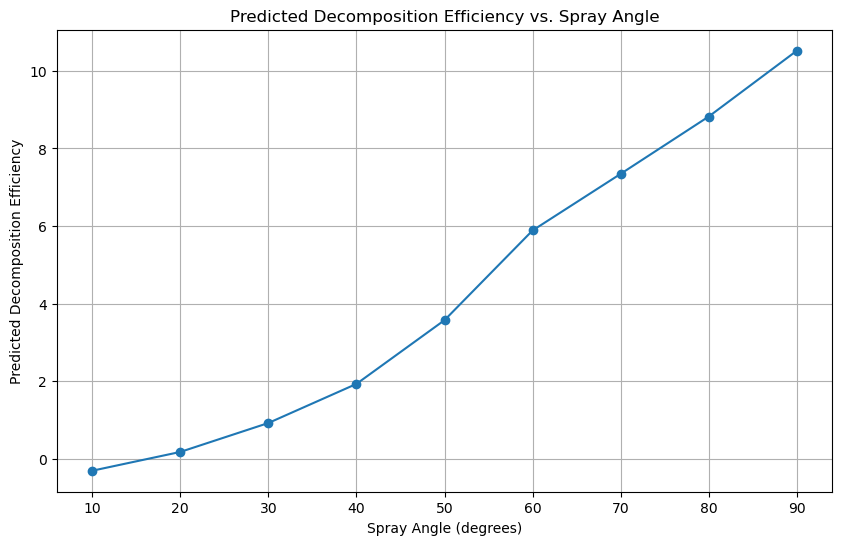

In [299]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(sample_data['spray_angle_deg'], sample_data['Predicted_DE'], marker='o', linestyle='-')
plt.title('Predicted Decomposition Efficiency vs. Spray Angle')
plt.xlabel('Spray Angle (degrees)')
plt.ylabel('Predicted Decomposition Efficiency')
plt.grid(True)
plt.show()
